## FREQUENCY DEFINITIONS:

$$S_k=\sum_{n=0}^{N-1}s(x) \exp \left\{- \rm i \quad \color{blue}{\overset{\text{angular (radians/sample)}}{\overbrace{2\pi \; \color{red}{\underset{\text{cycles/sample}}{\underbrace{\frac { k}N}}}}}} \quad n\;\right\}\quad n\in [0,\dots,N-1]$$

---
$$S_k=\sum_{n=0}^{N-1}s(x) \exp \left\{- \rm i \quad \color{blue}{\overset{\text{angular (radians/sec or mm)}}{\overbrace{2\pi \; \color{red}{\underset{\text{cycles/sec (Hz) or cycle/mm}}{\underbrace{\frac { k}{NT}}}}}}} \quad n\;\right\}\quad n\in [0,\dots,N-1]$$

---

##### FUNDAMENTAL ANGULAR FREQUENCY ([here](https://erickson.academic.wlu.edu/files/courses2020/sigproc_s2020/readings/DFT_Intro.pdf)):

$$\omega_0 = \frac{2\pi}{\text{NT}}=\frac{2\pi}{\text t}=2\pi \frac{
  \text f_s}{\text N}\quad\big[\text{radians/(cycle)} \big]$$

where

$\text N$ is the total number of samples taken from the analogue signal.

$\text T$ is the separation between samples (may be given in seconds or in simulations as below just separation between sampling points).

$\text f_s$ is the **sampling frequency or sample rate**: $\text f_s=\frac 1 {\text T}$

$\text{NT}$ is the total acquisition "time."

The fundamental angular frequency is such that in the sampled time $\text{NT}$ a cosine function goes through $1$ cycle: $\cos \omega_0 (t=0)=1,$ and again $\cos \omega_0(t=\text{NT})=1.$

---


##### ANGULAR FREQUENCY in the DFT:

$$\omega_k=k\omega_0=2\pi k \frac{1}{\text{NT}}=2\pi k \frac{\text f_s}{\text N}$$

where $k=\{0,\dots,\text N-1\}$

Notice that in numpy the fff.fftfreq() only produces the $k/NT$ values.

Discrete data can only contain frequencies between DC and one-half the sampling rate.

There is a fundamental or natural frequency corresponding to $\omega_0=2\pi/(\small\text{NT}),$ showing values ranging from $0$ to $\pi/T:$ The Nyquist frequency is at $\frac N 2 +1$ starting at zero, and hence, when $k = N/2,$ $\omega = \omega_0 k=\pi/T.$

Please note that sometimes $\text N$ is meant to just represent the total number of points, and in this case the maximum frequency is said to be $\pi.$

This is the way the simulations are set up as in the first example below. In pseudocode:

>N = 10000           # Sample points     
>T = 1/5000          # Spacing
>
>t = Vector of 10,000 elements from 0 to N*T=2.
>
>f0 = 25             # THE FREQUENCY TO RECOVER ON DFT, ESSENTIALLY "k" ABOVE!
>phi = np.pi/8       # Phase
>
>A = 50              # Amplitude

$s =A \cos(2  \pi  f_0  t - \phi)$ # Signal




To recover the analogue frequency in (Hz) from the original signal [here](https://stackoverflow.com/a/17391353/4089351):

$$\text{analogue fr. }[Hz]= \text{DFT angular fr.} \times \frac{\text f_s}{\text N}= \text{DFT angular fr.} \times \frac 1 {\text{NT}}$$

---

#### NORMALIZED or DIGITAL FREQUENCY ([here](https://zone.ni.com/reference/en-XX/help/371361R-01/lvanlsconcepts/normalized_frequency/)):

It ranges from $0$ when the analogue frequency is $0$ to $1$ when the analogue and the sampling frequency $\text f_s$ are equal:

$$\text{digital fr.}=\frac{\text{analogue fr.}}{\text{sampling fr. }}=\frac{\text{analogue fr.}}{\text f_s} \quad \Huge [\small\frac{\text{cycles}/\text{sec}}{\text{samples}/\text{sec}} =\text{cycles/sample}\Huge]$$

From [here](https://stackoverflow.com/a/70760108/4089351):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$$50 \cos(2\pi \;25\; t - \pi/8)= 50\cos(2\pi\; 25 t - 0.39)=50\cos(157t-0.39)$$

In [ ]:
N = 10000           # Sample points
T = 1/5000          # Spacing
# Total duration N * T= 2
t = np.linspace(0.0, N*T, N, endpoint=False) # Time: Vector of 10,000 elements from 0 to N*T=2.
frequency = np.fft.fftfreq(t.size, d=T)      # Normalized Fourier frequencies in spectrum.

f0 = 25             # Frequency of the sampled wave
phi = np.pi/8       # Phase
A = 50              # Amplitude

s = A * np.cos(2 * np.pi * f0 * t + phi) # Signal

S = np.fft.fft(s)   # Unnormalized FFT

index = np.argmax(np.abs(S))
print(S[index])
magnitude = np.abs(S[index]) * 2/N
freq_max = frequency[index]

phase = np.arctan(np.imag(S[index])/np.real(S[index]))
print(f"magnitude: {magnitude}, freq_max: {freq_max}, phase: {phase}")
print(phi)

(230969.88312782068+95670.85809127486j)
magnitude: 50.0, freq_max: 25.0, phase: 0.39269908169873463
0.39269908169872414


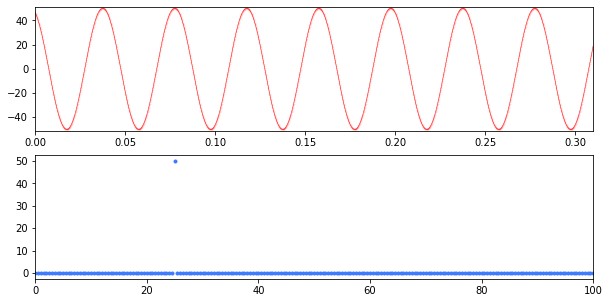

In [ ]:
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax1.plot(t,s, linewidth=0.5, linestyle='-', color='r', marker='o', markersize=1,markerfacecolor=(1, 0, 0, 0.1))
ax1.set_xlim([0, .31])
ax1.set_ylim([-51,51])
ax2.plot(frequency[0:N//2], 2/N * np.abs(S[0:N//2]), '.', color='xkcd:lightish blue', label='amplitude spectrum')
plt.xlim([0, 100])
plt.show()

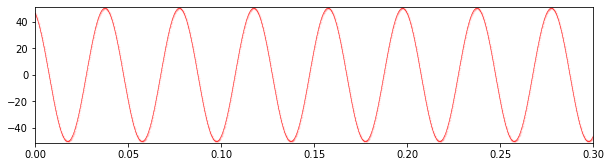

True

In [ ]:
# Reproducing s through sines and cosines from p.150 in [here](https://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_Ch8.pdf):

Re = np.real(S[index])
Im = np.imag(S[index])

s_recon = Re*2/N * np.cos(-2 * np.pi * freq_max * t) + abs(Im)*2/N * np.sin(-2 * np.pi * freq_max * t)

fig = plt.figure(figsize=(10, 2.5))

plt.xlim(0,0.3)
plt.ylim(-51,51)
plt.plot(t,s_recon, linewidth=0.5, linestyle='-', color='r', marker='o', markersize=1,markerfacecolor=(1, 0, 0, 0.1))
plt.show()

s.all() == s_recon.all()

In [ ]:
frequency # fff.fftfreq() returns multiples of the fundamental frequency kernel k/N*T as in the intro. They are not muliplied by 2 pi.

array([ 0. ,  0.5,  1. , ..., -1.5, -1. , -0.5])

In [ ]:
# Manual reproduction of the discrete frequencies:
man = np.array([ n / (N*T) if n < N/2 else (n - N)/(T*N) for n in range(N)])
print(man)
frequency.all() == man.all()

[ 0.   0.5  1.  ... -1.5 -1.  -0.5]


True

Second example from [here](https://blog.endaq.com/fourier-transform-basics):

$$x(t) = \cos(2\pi 1000 t) + \cos(2\pi 4000 t + \frac \pi 4) $$

sampled at $N=10$ points separate by $T_s=100\;\mu$-seconds (sampling period):

$$\begin{align}x[n] &= x(nT_s)= \cos\left(2\pi 1000\frac{100}{1000000} n\right) + \cos\left(2\pi 4000\frac{100}{1000000} n + \frac \pi 4\right)\\[2ex]
&=\cos\left(2\pi 1000\frac{1}{10000} n\right) + \cos\left(2\pi 4000\frac{1}{10000} n + \frac \pi 4\right)\\[2ex]
&=\cos\left(2\pi (0.1 n)\right) + \cos\left(2\pi (0.4 n) + \frac \pi 4\right)
\end{align}$$

[ 0.e+00  1.e+09  2.e+09  3.e+09  4.e+09 -5.e+09 -4.e+09 -3.e+09 -2.e+09
 -1.e+09]


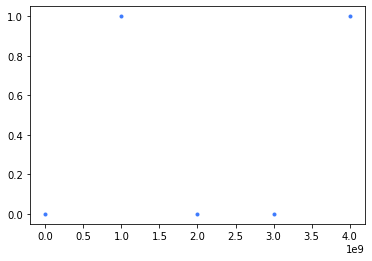

magnitude: 1.0, freq_max: 4000.0, phase: 0.7853981633974485
0.7853981633974483


In [ ]:
N = 10               # Sample points
T = 1/10000          # Spacing
# Total duration N * T
t = np.linspace(0.0, N*T, N, endpoint=False) # Time: Vector of 10,000 elements from 0 to N*T=2.
frequency = np.fft.fftfreq(t.size, d=T) # Normalized Fourier frequencies in spectrum.
Hzfreq = np.fft.fftfreq(t.size, d=T) / (N*T) * 1000 # In kHz
print(Hzfreq)

f0 =  1000             # First frequency of the sampled wave
f1 =  4000             # Second frequency of the sampled wave
phi = np.pi/4       # Phase
A = 1               # Amplitude

s = A * np.cos(2 * np.pi * f0 * t) + A * np.cos(2 * np.pi * f1 * t + np.pi/4) # Signal

S = np.fft.fft(s)   # Unnormalized FFT

plt.plot(Hzfreq[0:N//2], 2/N * np.abs(S[0:N//2]), '.', color='xkcd:lightish blue', label='amplitude spectrum')
plt.show()

index = np.argmax(np.abs(S))
magnitude = np.abs(S[index])*2/N
freq_max = frequency[index]
phase = np.arctan(np.imag(S[index])/np.real(S[index]))
print(f"magnitude: {magnitude}, freq_max: {freq_max}, phase: {phase}")
print(phi)

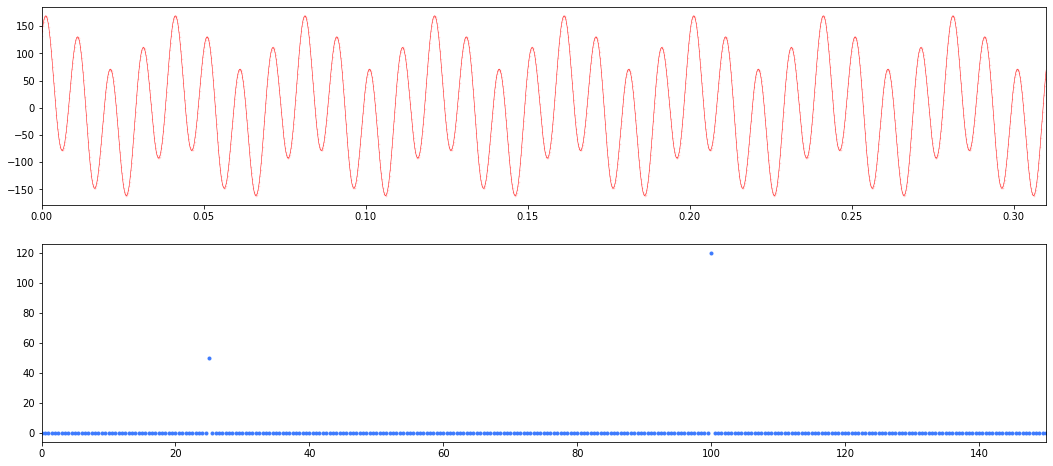

[9950   50  200 9800]
magnitude: [ 50.  50. 120. 120.], freq_max: [ -25.   25.  100. -100.], phase: [ 0.39269908 -0.39269908 -0.78539816  0.78539816]
0.39269908169872414
0.7853981633974483


In [ ]:
N = 10000           # Sample points
T = 1/5000          # Spacing
# Total duration N * T= 2
t = np.linspace(0.0, N*T, N, endpoint=False) # Time: Vector of 10,000 elements from 0 to N*T=2.
frequency = np.fft.fftfreq(t.size, d=T)      # Normalized Fourier frequencies in spectrum.


f0 = 25             # Frequency of the sampled wave
f1 = 100
phi = np.pi/8       # Phase
theta = np.pi/4
A = 50              # Amplitude
B = 120
s = A * np.cos(2 * np.pi * f0 * t - phi) +  B * np.cos(2 * np.pi * f1 * t - theta)          # Signal

S = np.fft.fft(s)   # Unnormalized FFT

fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(18, 8))
ax1.plot(t,s, linewidth=0.5, linestyle='-', color='r', marker='o', markersize=1,markerfacecolor=(1, 0, 0, 0.1))
ax1.set_xlim([0, .31])
ax2.plot(frequency[0:N//2], 2/N * np.abs(S[0:N//2]), '.', color='xkcd:lightish blue', label='amplitude spectrum')
ax2.set_xlim([0, 150])
plt.show()


index = np.argpartition(S,-4)[-4:] # These are the indices for the 4 top frequencies.
print(index)
magnitude = np.abs(S[index])*2/N
freq_max = frequency[index]

phase = np.arctan(np.imag(S[index])/np.real(S[index]))
print(f"magnitude: {magnitude}, freq_max: {freq_max}, phase: {phase}")
print(phi)
print(theta)

From [here](https://youtu.be/s2K1JfNR7Sc).

In [ ]:
# Create signal with two frequencies:

dt = 0.001 # Time step in samples/sec
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

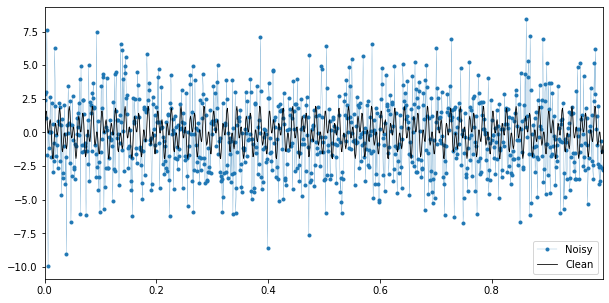

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.plot(t,f,'.-', linewidth=.2,label='Noisy')
plt.plot(t,f_clean,color='k', LineWidth=.8, label='Clean')
plt.xlim(t[0],t[-1])

plt.legend()

In [ ]:
# FFT
n = len(t)
fhat = np.fft.fft(f,n)
PSD =  fhat * np.conj(fhat) / n # Power spectrum density
   # (a+ib)(a-ib)=a^2+b^2
freq = (1/(dt*n)) * np.arange(n) # x-axis of frequencies
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of frequencies

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


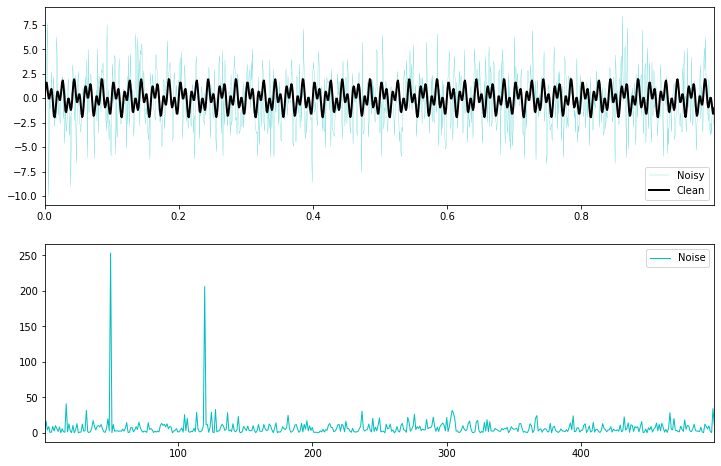

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(12, 8))

plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=.2,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=1,label='Noise')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [ ]:
# Filtering before taking the inverse:

indices = PSD > 100 # Find all frequencies with large power
PSDclean = PSD * indices # Zero out others
fhat = indices * fhat # Zero out small coefficients
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered signal

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


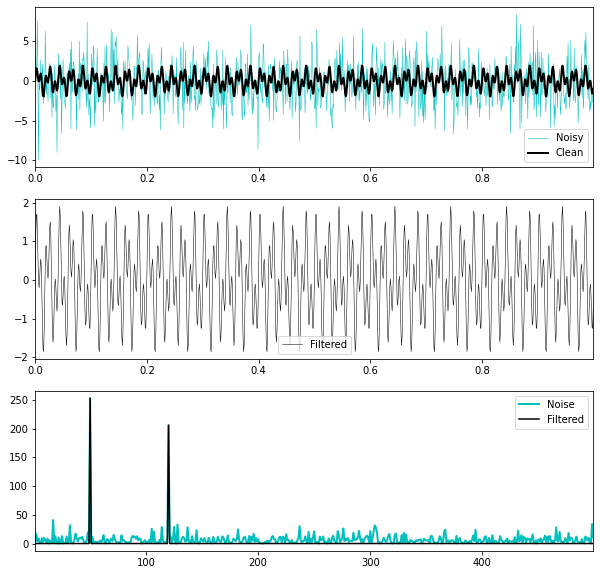

In [ ]:
fig,axs = plt.subplots(3,1,figsize=(10, 10))

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',LineWidth=.5,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noise')
plt.plot(freq[L],PSDclean[L],color='k',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

From [here](https://youtu.be/O0Y8FChBaFU):

In [ ]:
# Constructing time signal:

# Time domain:
Fs = 6000         # Sampling frequency (2 kHz)
tstep = 1/Fs      # Sample time interval
f0 = 300          # Signal frequency
phi = - np.pi/2
N = int(10*Fs / f0)  # Number of samples [cycles/sec]/[cycles/sec] Nyquist frequency calls for at least double.
t = np.linspace(0,(N-1)*tstep,N) # Time steps
# Frequency domain:
fstep = Fs / N                    # Frequency interval for each frequency bin
f = np.linspace(0, (N-1)*fstep,N) # Frequency steps to plot the frequency spectrum

y = 5 *  np.sin(2 * np.pi * f0 * t + phi) # y is the sinal in time domain

In [ ]:
# FFT

X = np.fft.fft(y)
X_mag = np.abs(X) / len(y) # len(y) is to normalize by the number of samples.

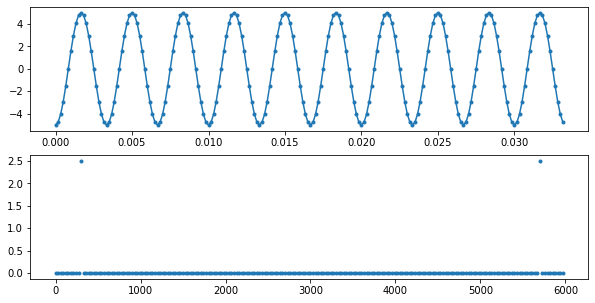

In [ ]:
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax1.plot(t,y,'.-')
ax2.plot(f,X_mag,'.')

plt.show()

In [ ]:
f_plot = f[0:int(N/2+1)]
X_mag_plot = 2* X_mag[0:int(N/2 + 1)]
X_mag_plot[0] = X_mag_plot[0]/2 # The DC does not need to be doubled

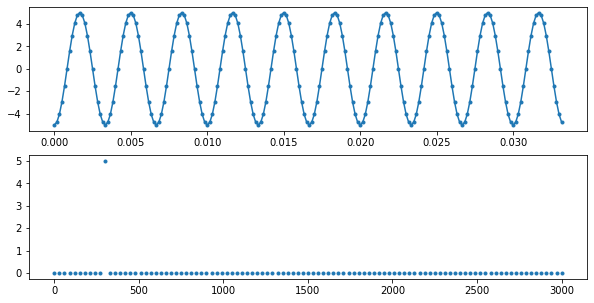

In [ ]:
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax1.plot(t,y,'.-')
ax2.plot(f_plot,X_mag_plot,'.')

plt.show() # Shows that the frequency 300 has amplitude 1:    5 *  np.sin(2 * np.pi * f0 * t)

In [ ]:
# Trying to recover the phase shift:

top_freq=X[np.argsort(np.abs(X))][-1]
np.angle(top_freq)
abs(top_freq)
print('Calculated like this the phase shift is', np.angle(top_freq), 'which is double to the phase shift used in abs values', - np.pi/2)

Calculated like this the phase shift is 3.1415926535897896 which is double to the phase shift used in abs values -1.5707963267948966


In [ ]:
phi = np.pi/4
y = 5 *  np.sin(2 * np.pi * f0 * t + phi) # y is the sinal in time domain
X = np.fft.fft(y)
X_mag = np.abs(X) / len(y)
top_freq=X[np.argsort(np.abs(X))][-1]
np.angle(top_freq)
abs(top_freq)
print('Calculated like this the phase shift is', np.angle(top_freq), 'which is difference to the phase shift used:', np.pi/4)

Calculated like this the phase shift is -0.7853981633974523 which is difference to the phase shift used: 0.7853981633974483


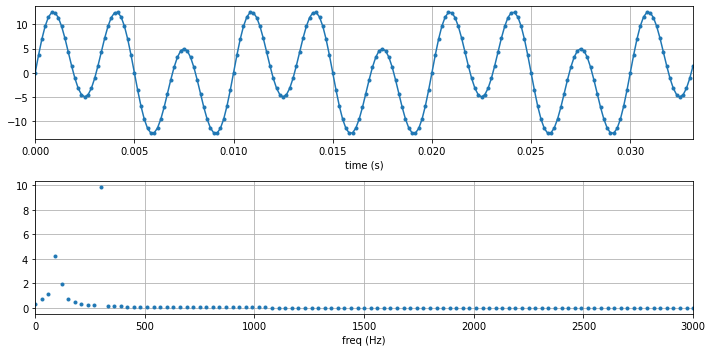

In [ ]:
# What if there are two frequencies:

y = 5 *  np.sin(2 * np.pi * 100 * t) + 10 * np.sin(2 * np.pi * 300 * t) # y is the sinal in time domain
X = np.fft.fft(y)
X_mag = np.abs(X) / len(y) # len(y) is to normalize by the number of samples.
f_plot = f[0:int(N/2+1)]
X_mag_plot = 2* X_mag[0:int(N/2 + 1)]
X_mag_plot[0] = X_mag_plot[0]/2
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax1.plot(t,y,'.-')
ax2.plot(f_plot,X_mag_plot,'.')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()
ax1.set_xlim(0,t[-1])
ax2.set_xlim(0,f_plot[-1])
plt.tight_layout()
plt.show()

From [here](https://dsp.stackexchange.com/a/72077/27561):

Magnitude: 44.805875391277276 , phase: -0.2672456406675483
Why is it not the same as 0.5235987755982988 ?


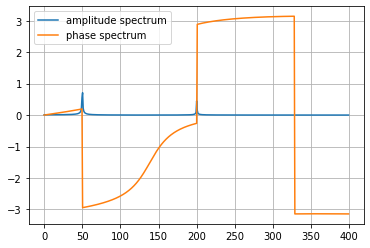

In [ ]:
# Number of sample points
N = 1000

# Sample spacing
T = 1.0 / 800.0     # f = 800 Hz

# Create a signal
x = np.linspace(0.0, N*T, N)
t0 = np.pi/6   # non-zero phase of the second sine
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(200.0 * 2.0*np.pi*x + t0)
yf = np.fft.fft(y) # to normalize use norm='ortho' as an additional argument

# Where is a 200 Hz frequency in the results?
freq = np.fft.fftfreq(x.size, d=T) # d is the sample spacing.
index, = np.where(np.isclose(freq, 200, atol=1/(T*N)))

# Get magnitude and phase
magnitude = np.abs(yf[index[0]])
phase = np.angle(yf[index[0]])
print("Magnitude:", magnitude, ", phase:", phase)
print('Why is it not the same as', np.pi/6,'?')
# Plot a spectrum
plt.plot(freq[0:N//2], 2/N*np.abs(yf[0:N//2]), label='amplitude spectrum')   # in a conventional form
plt.plot(freq[0:N//2], np.angle(yf[0:N//2]), label='phase spectrum')
plt.legend()
plt.grid()
plt.show()

The following is extracted from [here](https://stackoverflow.com/a/59979450/4089351).

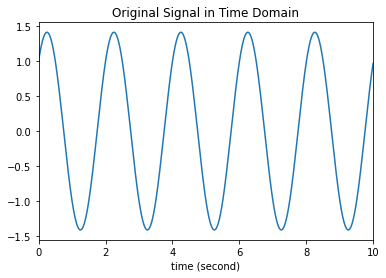

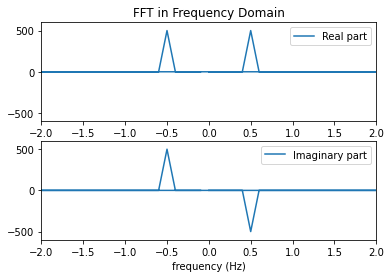

In [ ]:
#fs is sampling frequency
fs = 100.0
time = np.linspace(0,10,int(10*fs),endpoint=False)

#wave is the sum of sine wave(1Hz) and cosine wave(10 Hz)
wave = np.sin(np.pi*time)+ np.cos(np.pi*time)
#wave = np.exp(2j * np.pi * time )

plt.plot(time, wave)
plt.xlim(0,10)
plt.xlabel("time (second)")
plt.title('Original Signal in Time Domain')

plt.show()

fft_wave = np.fft.fft(wave)

# Compute the Discrete Fourier Transform sample frequencies.

fft_fre = np.fft.fftfreq(n=wave.size, d=1/fs)

plt.subplot(211)
plt.plot(fft_fre, fft_wave.real, label="Real part")
plt.xlim(-2,2)
plt.ylim(-600,600)
plt.legend(loc=1)
plt.title("FFT in Frequency Domain")

plt.subplot(212)
plt.plot(fft_fre, fft_wave.imag,label="Imaginary part")
plt.legend(loc=1)
plt.xlim(-2,2)
plt.ylim(-600,600)
plt.xlabel("frequency (Hz)")

plt.show()

(499.99999999999983-500.00000000000017j)


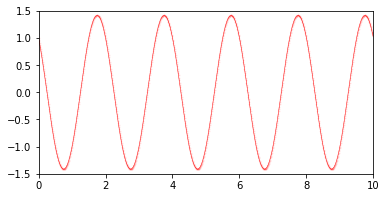

In [ ]:
# Because of the way "wave" was set up with np.pi instead of 2*np.pi, the frequencies are fine but there is an offset:

index = np.argmax(np.abs(fft_wave))
print(fft_wave[index])

frecy = np.fft.fftfreq(time.size, d=1/fs)
fr_max = frecy[index]

Re = np.real(fft_wave[index])
Im = np.imag(fft_wave[index])

s_recon = Re*2/N * np.cos(- 2*np.pi * fr_max * time) + abs(Im)*2/N * np.sin(- 2*np.pi * fr_max * time)

fig = plt.figure(figsize=(6, 3))

plt.xlim(0,10)
plt.ylim(-1.5,1.5)
plt.plot(time, s_recon, linewidth=0.5, linestyle='-', color='r', marker='o', markersize=1,markerfacecolor=(1, 0, 0, 0.1))
plt.show()